[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab09.ipynb)

**Train the model**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set device and random seeds
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)

# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2048, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# 2. Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 2048)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(2048, 256)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.relu3(self.linear3(x))
        x = self.linear4(x)
        x = self.dropout(x)
        return x

# 3. Train the Model
def train_model():
    model = MLP().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print("Training MNIST classifier...")
    for epoch in range(8):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

    # Test accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")
    return model

# Train model and freeze parameters
model = train_model()
model.eval()
for param in model.parameters():
    param.requires_grad = False


100%|██████████| 9.91M/9.91M [00:00<00:00, 130MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 16.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 111MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.42MB/s]


Training MNIST classifier...


Epoch 1: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


Epoch 1, Loss: 0.6782


Epoch 2: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]


Epoch 2, Loss: 0.1970


Epoch 3: 100%|██████████| 30/30 [00:34<00:00,  1.16s/it]


Epoch 3, Loss: 0.1281


Epoch 4: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]


Epoch 4, Loss: 0.0912


Epoch 5: 100%|██████████| 30/30 [00:38<00:00,  1.29s/it]


Epoch 5, Loss: 0.0690


Epoch 6: 100%|██████████| 30/30 [00:33<00:00,  1.12s/it]


Epoch 6, Loss: 0.0566


Epoch 7: 100%|██████████| 30/30 [00:34<00:00,  1.16s/it]


Epoch 7, Loss: 0.0442


Epoch 8: 100%|██████████| 30/30 [00:34<00:00,  1.17s/it]


Epoch 8, Loss: 0.0400
Test Accuracy: 97.90%


**Use trained model and change the input digits based on losses**


=== Task 1: Generating digits 0-9 from noise ===
Iteration 0: Loss = 4.3764, Avg Confidence = 0.1117
Iteration 50: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 100: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 150: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 200: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 250: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 300: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 350: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 400: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 450: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 500: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 550: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 600: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 650: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 700: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 750: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 800: Loss = 0.0000, Avg Confidence = 1.0000
Iteration 850: Loss = 0.0000, Avg C

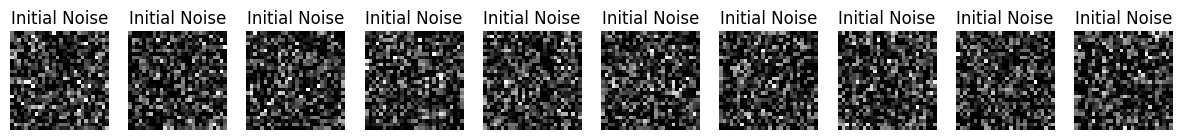

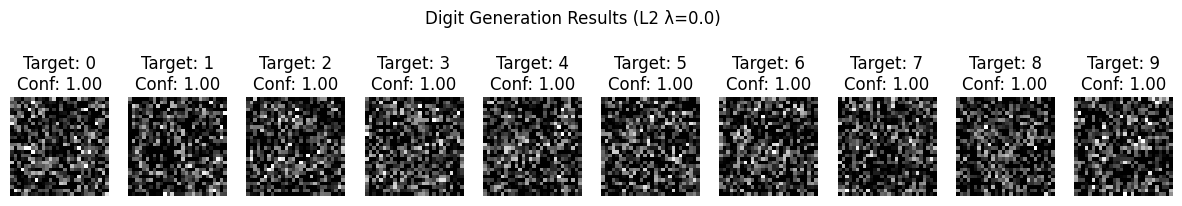

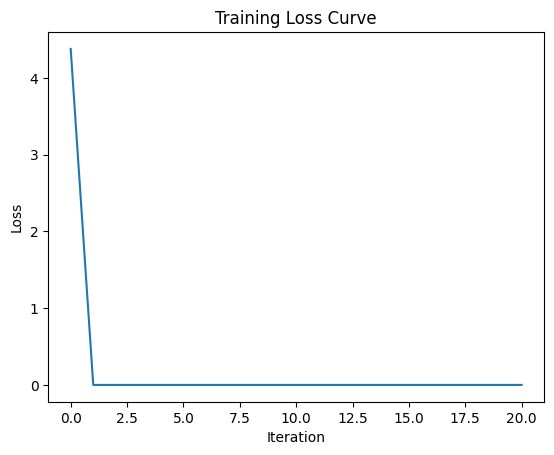


=== Task 2: Generating hybrid digits ===
Iteration 0: Loss = 6.8813
Probabilities: {tensor(3): 0.0008326288079842925, tensor(8): 0.001266207080334425}
Iteration 50: Loss = 0.6998
Probabilities: {tensor(3): 0.5417278409004211, tensor(8): 0.45534375309944153}
Iteration 100: Loss = 0.6950
Probabilities: {tensor(3): 0.5017216801643372, tensor(8): 0.4964544475078583}
Iteration 150: Loss = 0.6945
Probabilities: {tensor(3): 0.49917522072792053, tensor(8): 0.4995099902153015}
Iteration 200: Loss = 0.6942
Probabilities: {tensor(3): 0.49952051043510437, tensor(8): 0.49946168065071106}
Iteration 250: Loss = 0.6940
Probabilities: {tensor(3): 0.49962252378463745, tensor(8): 0.4995551109313965}
Iteration 300: Loss = 0.6938
Probabilities: {tensor(3): 0.49969059228897095, tensor(8): 0.4996274411678314}
Iteration 350: Loss = 0.6937
Probabilities: {tensor(3): 0.49973443150520325, tensor(8): 0.4996914267539978}
Iteration 400: Loss = 0.6936
Probabilities: {tensor(3): 0.49976974725723267, tensor(8): 0.499

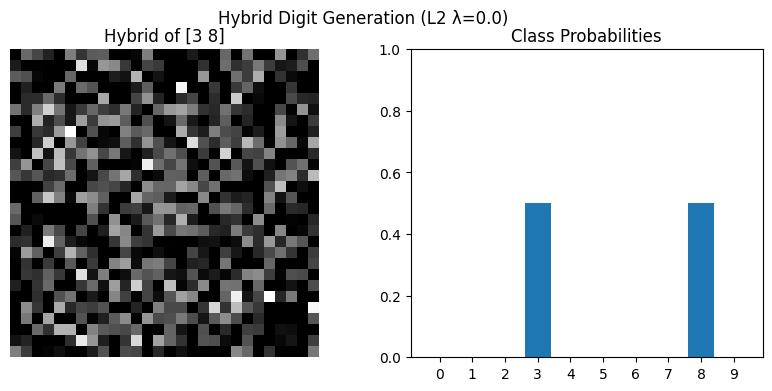

Iteration 0: Loss = 8.0136
Probabilities: {tensor(0): 0.00037942908238619566, tensor(6): 0.00028862894396297634}
Iteration 50: Loss = 0.6932
Probabilities: {tensor(0): 0.5020799040794373, tensor(6): 0.4978709816932678}
Iteration 100: Loss = 0.6932
Probabilities: {tensor(0): 0.4991315007209778, tensor(6): 0.5008248090744019}
Iteration 150: Loss = 0.6932
Probabilities: {tensor(0): 0.49991050362586975, tensor(6): 0.5000466108322144}
Iteration 200: Loss = 0.6932
Probabilities: {tensor(0): 0.4999743700027466, tensor(6): 0.499983549118042}
Iteration 250: Loss = 0.6932
Probabilities: {tensor(0): 0.49997252225875854, tensor(6): 0.4999862313270569}
Iteration 300: Loss = 0.6932
Probabilities: {tensor(0): 0.49997246265411377, tensor(6): 0.49998724460601807}
Iteration 350: Loss = 0.6932
Probabilities: {tensor(0): 0.49997270107269287, tensor(6): 0.49998795986175537}
Iteration 400: Loss = 0.6932
Probabilities: {tensor(0): 0.4999731183052063, tensor(6): 0.4999886155128479}
Iteration 450: Loss = 0.693

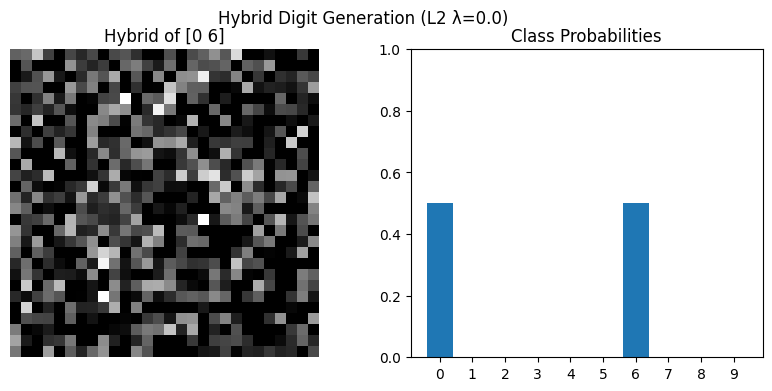

Iteration 0: Loss = 13.2841
Probabilities: {tensor(3): 0.09257012605667114, tensor(8): 0.0052307904697954655}
Iteration 50: Loss = 1.3574
Probabilities: {tensor(3): 0.4602660536766052, tensor(8): 0.4714478850364685}
Iteration 100: Loss = 0.8956
Probabilities: {tensor(3): 0.474737286567688, tensor(8): 0.4629913866519928}
Iteration 150: Loss = 0.8740
Probabilities: {tensor(3): 0.4772138297557831, tensor(8): 0.4616829752922058}
Iteration 200: Loss = 0.8725
Probabilities: {tensor(3): 0.491860955953598, tensor(8): 0.44756990671157837}
Iteration 250: Loss = 0.8820
Probabilities: {tensor(3): 0.4073983430862427, tensor(8): 0.5301850438117981}
Iteration 300: Loss = 0.8724
Probabilities: {tensor(3): 0.493219256401062, tensor(8): 0.44622930884361267}
Iteration 350: Loss = 0.8779
Probabilities: {tensor(3): 0.42488768696784973, tensor(8): 0.5129680037498474}
Iteration 400: Loss = 0.8726
Probabilities: {tensor(3): 0.4942783713340759, tensor(8): 0.4450831711292267}
Iteration 450: Loss = 0.8726
Probab

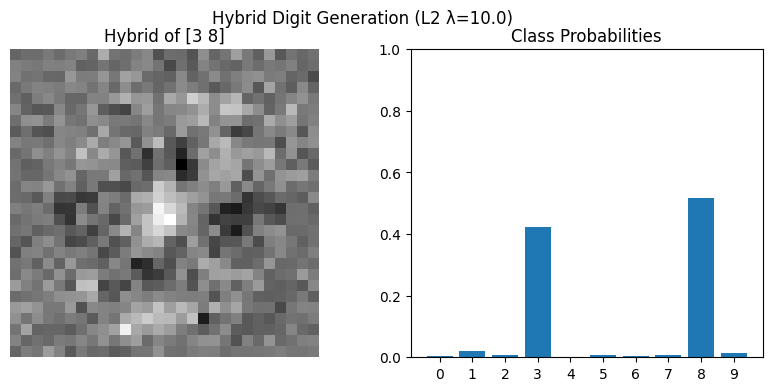

Iteration 0: Loss = 16.5975
Probabilities: {tensor(0): 0.0004549479635898024, tensor(6): 0.006316052749752998}
Iteration 50: Loss = 1.5650
Probabilities: {tensor(0): 0.39887726306915283, tensor(6): 0.5528519749641418}
Iteration 100: Loss = 0.8491
Probabilities: {tensor(0): 0.4725258946418762, tensor(6): 0.48926272988319397}
Iteration 150: Loss = 0.8186
Probabilities: {tensor(0): 0.47824952006340027, tensor(6): 0.4838195741176605}
Iteration 200: Loss = 0.8176
Probabilities: {tensor(0): 0.4789535403251648, tensor(6): 0.483189195394516}
Iteration 250: Loss = 0.8175
Probabilities: {tensor(0): 0.47869664430618286, tensor(6): 0.48350533843040466}
Iteration 300: Loss = 0.8175
Probabilities: {tensor(0): 0.47930246591567993, tensor(6): 0.4829004108905792}
Iteration 350: Loss = 0.8175
Probabilities: {tensor(0): 0.4774271845817566, tensor(6): 0.4848126769065857}
Iteration 400: Loss = 0.8175
Probabilities: {tensor(0): 0.47837355732917786, tensor(6): 0.4838443696498871}
Iteration 450: Loss = 0.8175

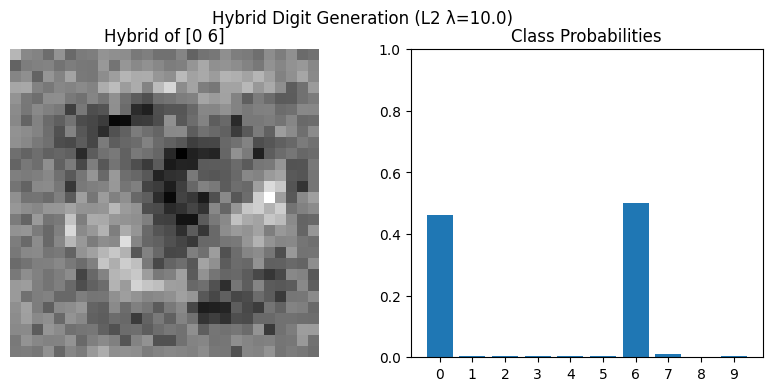


=== Task 3: Testing L2 regularization ===

Generating with L2 λ=0.001
Iteration 0: Loss = 5.9529, Avg Confidence = 0.0752
Iteration 50: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 100: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 150: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 200: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 250: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 300: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 350: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 400: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 450: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 500: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 550: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 600: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 650: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 700: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 750: Loss = 0.0011, Avg Confidence = 1.0000
Iteration 800: Loss = 0.0010, Avg Confidence = 1.0000
Iteration 850:

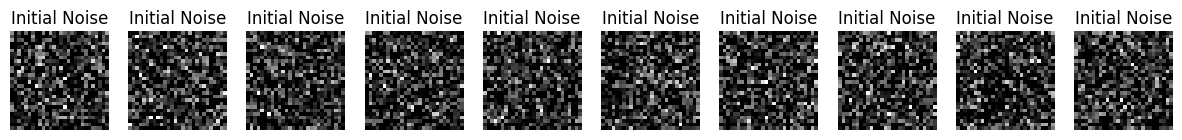

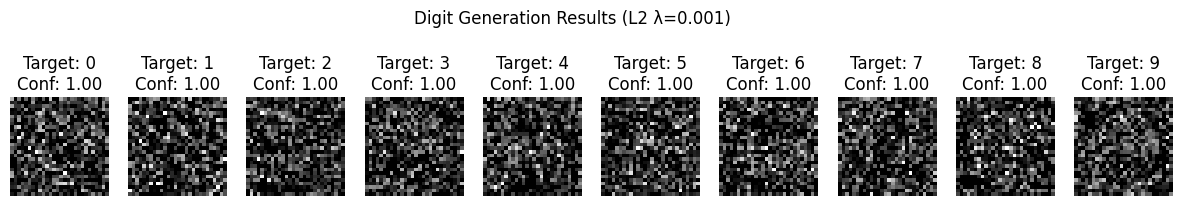

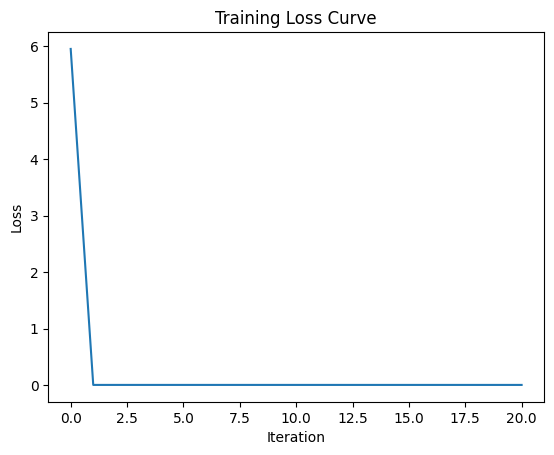


Generating with L2 λ=0.01
Iteration 0: Loss = 5.7354, Avg Confidence = 0.0262
Iteration 50: Loss = 0.0116, Avg Confidence = 1.0000
Iteration 100: Loss = 0.0114, Avg Confidence = 1.0000
Iteration 150: Loss = 0.0112, Avg Confidence = 1.0000
Iteration 200: Loss = 0.0109, Avg Confidence = 1.0000
Iteration 250: Loss = 0.0106, Avg Confidence = 1.0000
Iteration 300: Loss = 0.0102, Avg Confidence = 1.0000
Iteration 350: Loss = 0.0099, Avg Confidence = 1.0000
Iteration 400: Loss = 0.0096, Avg Confidence = 1.0000
Iteration 450: Loss = 0.0092, Avg Confidence = 1.0000
Iteration 500: Loss = 0.0089, Avg Confidence = 1.0000
Iteration 550: Loss = 0.0085, Avg Confidence = 1.0000
Iteration 600: Loss = 0.0082, Avg Confidence = 1.0000
Iteration 650: Loss = 0.0079, Avg Confidence = 1.0000
Iteration 700: Loss = 0.0076, Avg Confidence = 1.0000
Iteration 750: Loss = 0.0072, Avg Confidence = 1.0000
Iteration 800: Loss = 0.0069, Avg Confidence = 1.0000
Iteration 850: Loss = 0.0066, Avg Confidence = 1.0000
Iter

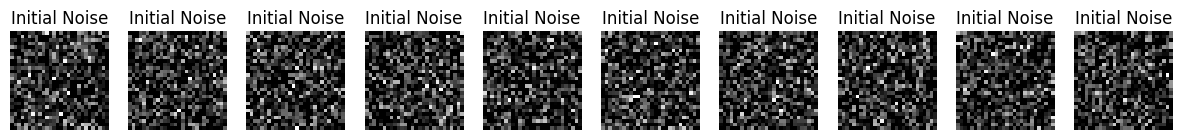

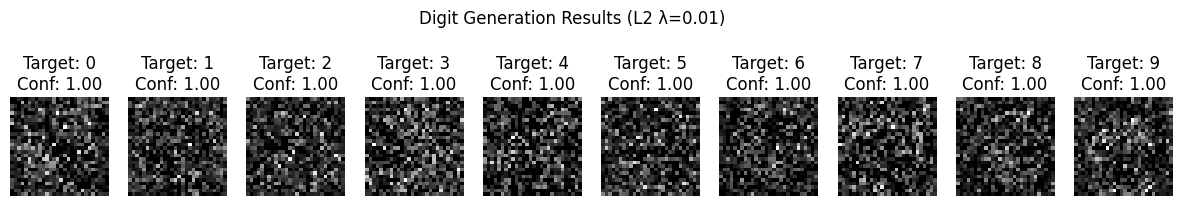

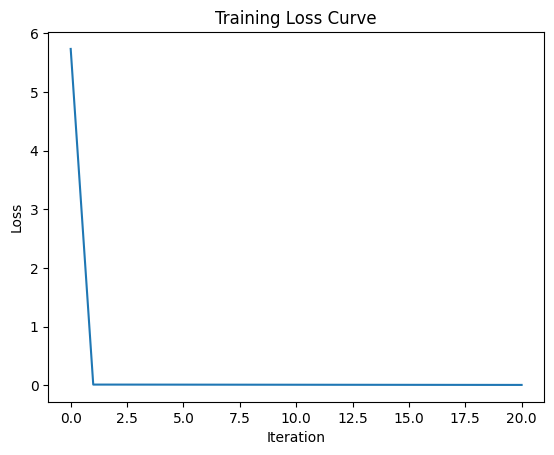


Generating with L2 λ=0.1
Iteration 0: Loss = 4.5320, Avg Confidence = 0.1921
Iteration 50: Loss = 0.0923, Avg Confidence = 1.0000
Iteration 100: Loss = 0.0769, Avg Confidence = 1.0000
Iteration 150: Loss = 0.0633, Avg Confidence = 0.9999
Iteration 200: Loss = 0.0519, Avg Confidence = 0.9999
Iteration 250: Loss = 0.0426, Avg Confidence = 0.9999
Iteration 300: Loss = 0.0350, Avg Confidence = 0.9998
Iteration 350: Loss = 0.0289, Avg Confidence = 0.9998
Iteration 400: Loss = 0.0239, Avg Confidence = 0.9997
Iteration 450: Loss = 0.0199, Avg Confidence = 0.9997
Iteration 500: Loss = 0.0166, Avg Confidence = 0.9997
Iteration 550: Loss = 0.0139, Avg Confidence = 0.9997
Iteration 600: Loss = 0.0117, Avg Confidence = 0.9997
Iteration 650: Loss = 0.0100, Avg Confidence = 0.9996
Iteration 700: Loss = 0.0085, Avg Confidence = 0.9996
Iteration 750: Loss = 0.0074, Avg Confidence = 0.9996
Iteration 800: Loss = 0.0064, Avg Confidence = 0.9996
Iteration 850: Loss = 0.0056, Avg Confidence = 0.9996
Itera

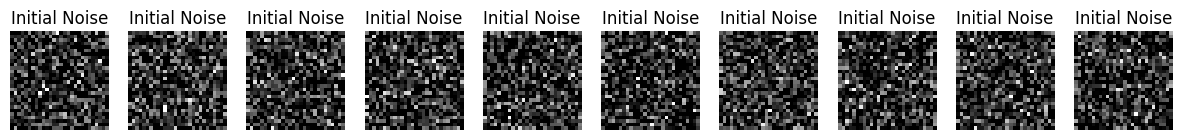

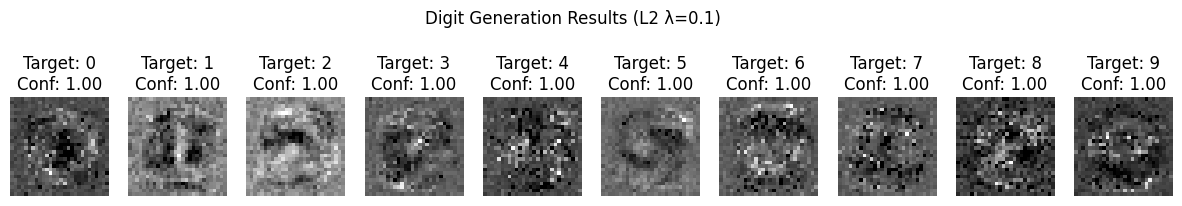

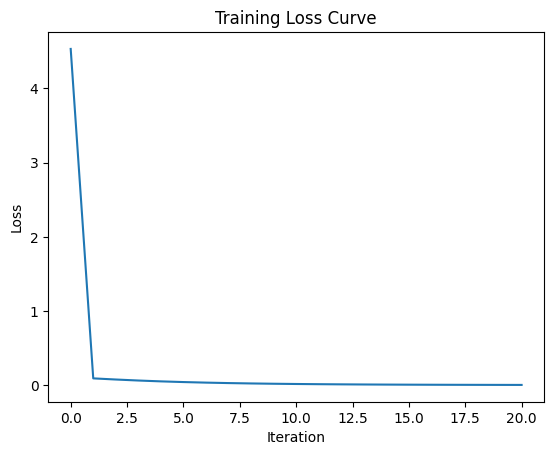


Generating with L2 λ=0.5
Iteration 0: Loss = 5.8966, Avg Confidence = 0.0326
Iteration 50: Loss = 0.3941, Avg Confidence = 1.0000
Iteration 100: Loss = 0.2405, Avg Confidence = 0.9998
Iteration 150: Loss = 0.1467, Avg Confidence = 0.9992
Iteration 200: Loss = 0.0915, Avg Confidence = 0.9987
Iteration 250: Loss = 0.0588, Avg Confidence = 0.9985
Iteration 300: Loss = 0.0392, Avg Confidence = 0.9984
Iteration 350: Loss = 0.0272, Avg Confidence = 0.9984
Iteration 400: Loss = 0.0199, Avg Confidence = 0.9984
Iteration 450: Loss = 0.0154, Avg Confidence = 0.9984
Iteration 500: Loss = 0.0126, Avg Confidence = 0.9984
Iteration 550: Loss = 0.0109, Avg Confidence = 0.9984
Iteration 600: Loss = 0.0098, Avg Confidence = 0.9984
Iteration 650: Loss = 0.0091, Avg Confidence = 0.9984
Iteration 700: Loss = 0.0087, Avg Confidence = 0.9984
Iteration 750: Loss = 0.0085, Avg Confidence = 0.9984
Iteration 800: Loss = 0.0083, Avg Confidence = 0.9984
Iteration 850: Loss = 0.0082, Avg Confidence = 0.9984
Itera

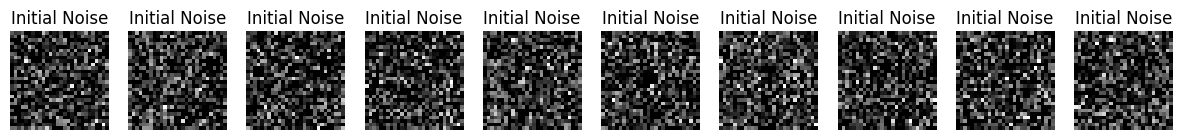

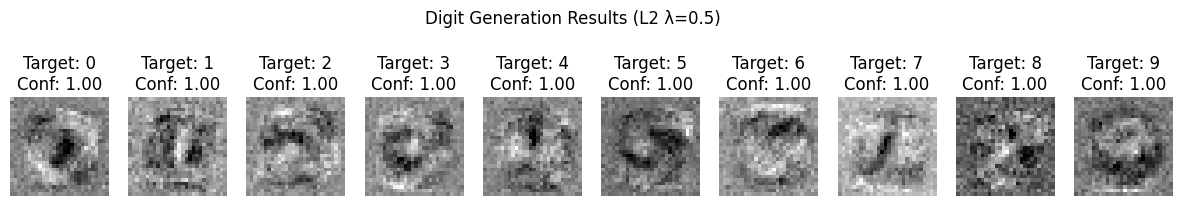

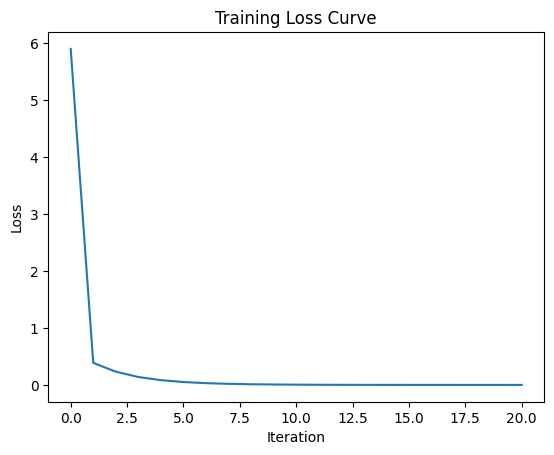


Generating with L2 λ=1.0
Iteration 0: Loss = 6.0688, Avg Confidence = 0.0893
Iteration 50: Loss = 0.5401, Avg Confidence = 0.9996
Iteration 100: Loss = 0.2292, Avg Confidence = 0.9984
Iteration 150: Loss = 0.1079, Avg Confidence = 0.9973
Iteration 200: Loss = 0.0575, Avg Confidence = 0.9970
Iteration 250: Loss = 0.0347, Avg Confidence = 0.9970
Iteration 300: Loss = 0.0240, Avg Confidence = 0.9970
Iteration 350: Loss = 0.0189, Avg Confidence = 0.9971
Iteration 400: Loss = 0.0164, Avg Confidence = 0.9971
Iteration 450: Loss = 0.0152, Avg Confidence = 0.9971
Iteration 500: Loss = 0.0146, Avg Confidence = 0.9971
Iteration 550: Loss = 0.0143, Avg Confidence = 0.9971
Iteration 600: Loss = 0.0141, Avg Confidence = 0.9971
Iteration 650: Loss = 0.0141, Avg Confidence = 0.9971
Iteration 700: Loss = 0.0140, Avg Confidence = 0.9971
Iteration 750: Loss = 0.0140, Avg Confidence = 0.9971
Iteration 800: Loss = 0.0140, Avg Confidence = 0.9971
Iteration 850: Loss = 0.0140, Avg Confidence = 0.9971
Itera

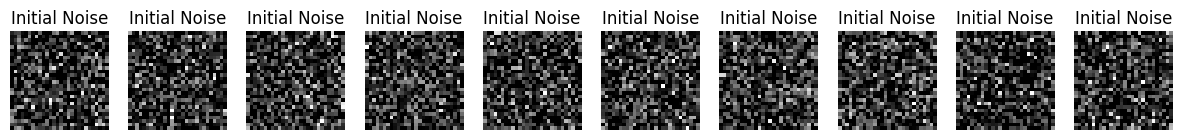

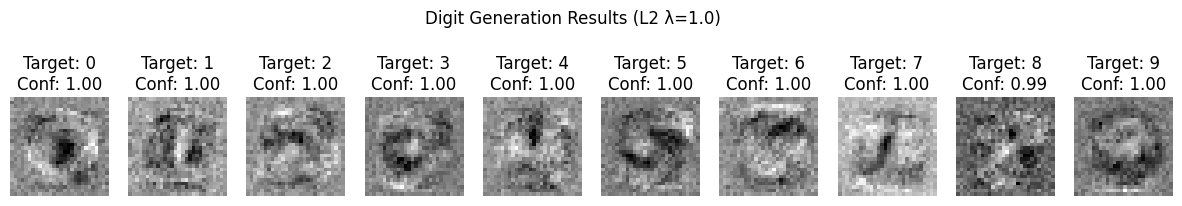

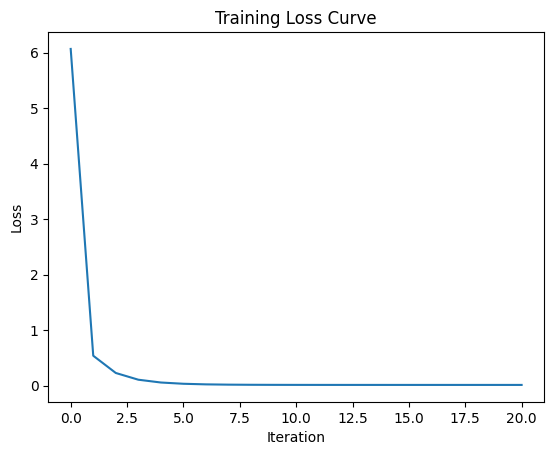


Generating with L2 λ=5.0
Iteration 0: Loss = 11.7621, Avg Confidence = 0.0087
Iteration 50: Loss = 0.8283, Avg Confidence = 0.9889
Iteration 100: Loss = 0.1410, Avg Confidence = 0.9874
Iteration 150: Loss = 0.0623, Avg Confidence = 0.9880
Iteration 200: Loss = 0.0511, Avg Confidence = 0.9882
Iteration 250: Loss = 0.0491, Avg Confidence = 0.9883
Iteration 300: Loss = 0.0487, Avg Confidence = 0.9883
Iteration 350: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 400: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 450: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 500: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 550: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 600: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 650: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 700: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 750: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 800: Loss = 0.0486, Avg Confidence = 0.9883
Iteration 850: Loss = 0.0486, Avg Confidence = 0.9883
Iter

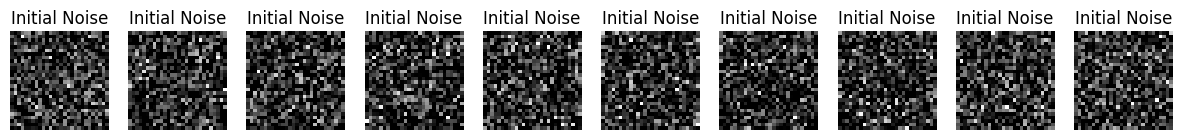

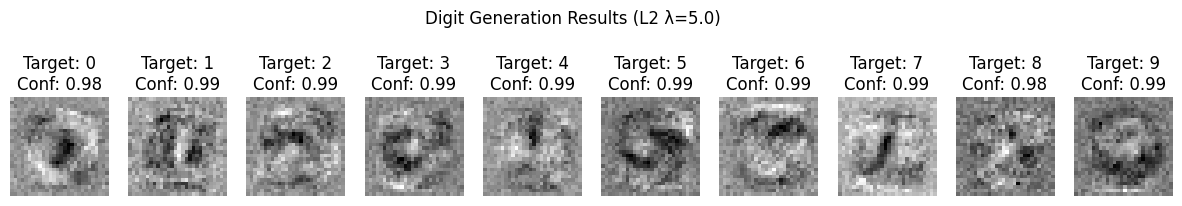

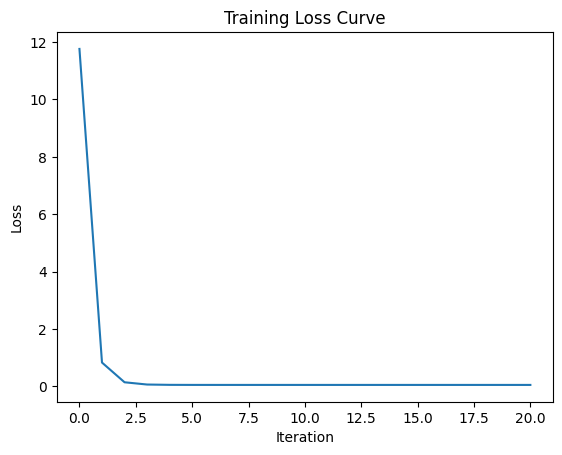


Generating with L2 λ=10.0
Iteration 0: Loss = 15.0098, Avg Confidence = 0.1451
Iteration 50: Loss = 0.4975, Avg Confidence = 0.9729
Iteration 100: Loss = 0.0946, Avg Confidence = 0.9784
Iteration 150: Loss = 0.0824, Avg Confidence = 0.9788
Iteration 200: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 250: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 300: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 350: Loss = 0.0820, Avg Confidence = 0.9789
Iteration 400: Loss = 0.0820, Avg Confidence = 0.9789
Iteration 450: Loss = 0.0820, Avg Confidence = 0.9789
Iteration 500: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 550: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 600: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 650: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 700: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 750: Loss = 0.0821, Avg Confidence = 0.9788
Iteration 800: Loss = 0.0820, Avg Confidence = 0.9788
Iteration 850: Loss = 0.0820, Avg Confidence = 0.9789
Ite

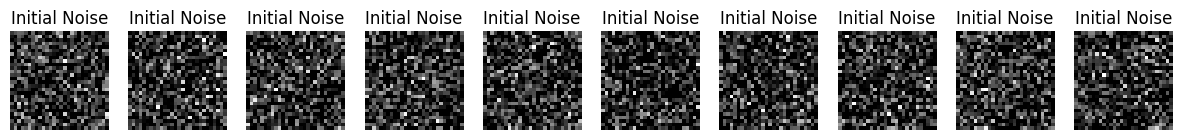

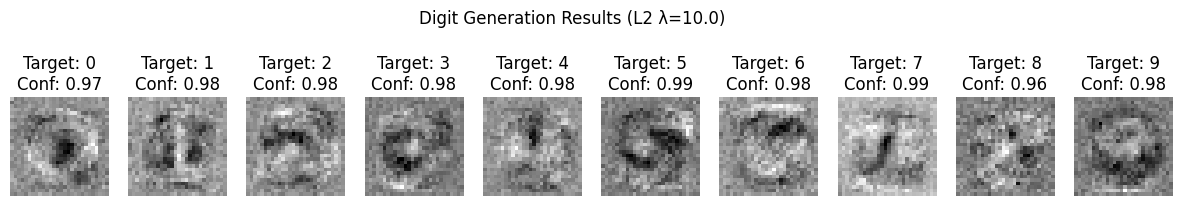

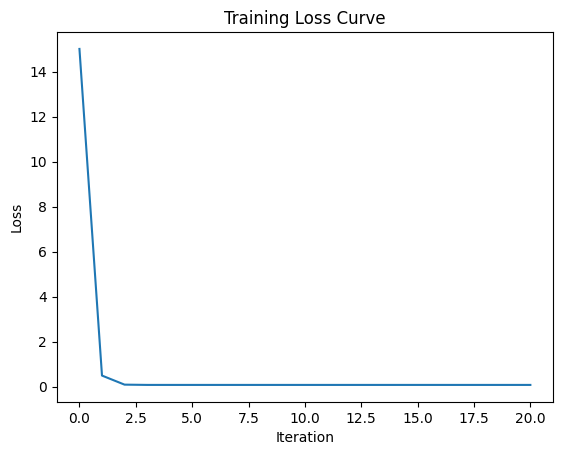


Generating hybrid with L2 λ=0.001
Iteration 0: Loss = 6.7192
Probabilities: {tensor(3): 0.24954089522361755, tensor(8): 5.854987193743e-06}
Iteration 50: Loss = 0.7029
Probabilities: {tensor(3): 0.48857206106185913, tensor(8): 0.5029869675636292}
Iteration 100: Loss = 0.6975
Probabilities: {tensor(3): 0.4945020377635956, tensor(8): 0.5023370981216431}
Iteration 150: Loss = 0.6961
Probabilities: {tensor(3): 0.49900248646736145, tensor(8): 0.4991908669471741}
Iteration 200: Loss = 0.6955
Probabilities: {tensor(3): 0.49948209524154663, tensor(8): 0.49929967522621155}
Iteration 250: Loss = 0.6952
Probabilities: {tensor(3): 0.49962714314460754, tensor(8): 0.4994686245918274}
Iteration 300: Loss = 0.6950
Probabilities: {tensor(3): 0.4997169077396393, tensor(8): 0.4995810091495514}
Iteration 350: Loss = 0.6949
Probabilities: {tensor(3): 0.49975526332855225, tensor(8): 0.49967923760414124}
Iteration 400: Loss = 0.6948
Probabilities: {tensor(3): 0.49980053305625916, tensor(8): 0.49973011016845

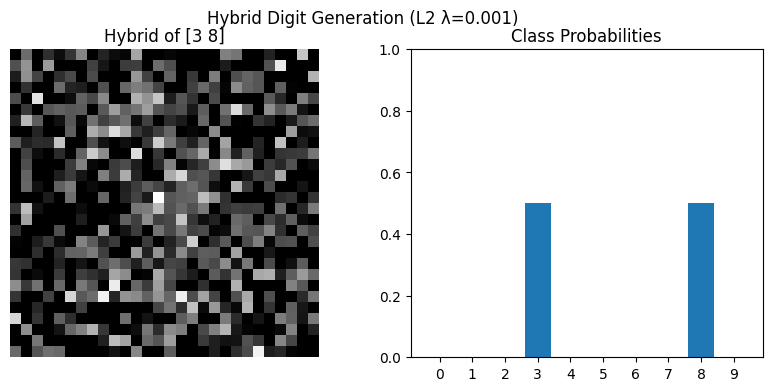

Iteration 0: Loss = 10.3205
Probabilities: {tensor(0): 9.516774298390374e-06, tensor(6): 0.00011432089377194643}
Iteration 50: Loss = 0.7138
Probabilities: {tensor(0): 0.5910173058509827, tensor(6): 0.40676239132881165}
Iteration 100: Loss = 0.6958
Probabilities: {tensor(0): 0.5050789713859558, tensor(6): 0.4934162497520447}
Iteration 150: Loss = 0.6954
Probabilities: {tensor(0): 0.49888718128204346, tensor(6): 0.49999064207077026}
Iteration 200: Loss = 0.6951
Probabilities: {tensor(0): 0.4994443655014038, tensor(6): 0.4996843636035919}
Iteration 250: Loss = 0.6950
Probabilities: {tensor(0): 0.4995301067829132, tensor(6): 0.4997757375240326}
Iteration 300: Loss = 0.6948
Probabilities: {tensor(0): 0.49961164593696594, tensor(6): 0.49982619285583496}
Iteration 350: Loss = 0.6947
Probabilities: {tensor(0): 0.49968433380126953, tensor(6): 0.4998526871204376}
Iteration 400: Loss = 0.6947
Probabilities: {tensor(0): 0.4997333586215973, tensor(6): 0.499878853559494}
Iteration 450: Loss = 0.694

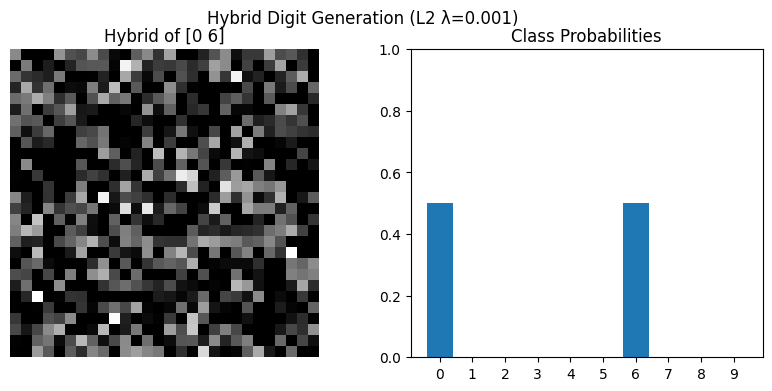


Generating hybrid with L2 λ=0.01
Iteration 0: Loss = 4.3793
Probabilities: {tensor(3): 0.701282262802124, tensor(8): 0.0002287157258251682}
Iteration 50: Loss = 0.7060
Probabilities: {tensor(3): 0.487314373254776, tensor(8): 0.5116435289382935}
Iteration 100: Loss = 0.7054
Probabilities: {tensor(3): 0.5010378360748291, tensor(8): 0.4980950951576233}
Iteration 150: Loss = 0.7052
Probabilities: {tensor(3): 0.49973174929618835, tensor(8): 0.49953293800354004}
Iteration 200: Loss = 0.7049
Probabilities: {tensor(3): 0.49973806738853455, tensor(8): 0.4996306002140045}
Iteration 250: Loss = 0.7046
Probabilities: {tensor(3): 0.49977147579193115, tensor(8): 0.49967506527900696}
Iteration 300: Loss = 0.7043
Probabilities: {tensor(3): 0.4998033940792084, tensor(8): 0.49970173835754395}
Iteration 350: Loss = 0.7040
Probabilities: {tensor(3): 0.4998164176940918, tensor(8): 0.4997331202030182}
Iteration 400: Loss = 0.7037
Probabilities: {tensor(3): 0.4998270273208618, tensor(8): 0.49975600838661194

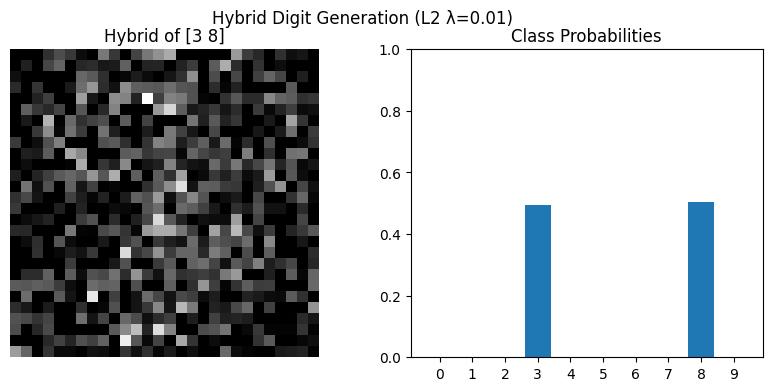

Iteration 0: Loss = 6.1443
Probabilities: {tensor(0): 0.0010703038424253464, tensor(6): 0.004382781218737364}
Iteration 50: Loss = 0.7057
Probabilities: {tensor(0): 0.47669756412506104, tensor(6): 0.5222068428993225}
Iteration 100: Loss = 0.7044
Probabilities: {tensor(0): 0.4967217445373535, tensor(6): 0.5024433732032776}
Iteration 150: Loss = 0.7041
Probabilities: {tensor(0): 0.5000076293945312, tensor(6): 0.4993297755718231}
Iteration 200: Loss = 0.7039
Probabilities: {tensor(0): 0.49969348311424255, tensor(6): 0.4997674822807312}
Iteration 250: Loss = 0.7037
Probabilities: {tensor(0): 0.4997512698173523, tensor(6): 0.4997974932193756}
Iteration 300: Loss = 0.7035
Probabilities: {tensor(0): 0.4998078942298889, tensor(6): 0.4998055100440979}
Iteration 350: Loss = 0.7033
Probabilities: {tensor(0): 0.49981415271759033, tensor(6): 0.4998464584350586}
Iteration 400: Loss = 0.7030
Probabilities: {tensor(0): 0.49985817074775696, tensor(6): 0.4998380243778229}
Iteration 450: Loss = 0.7028
Pr

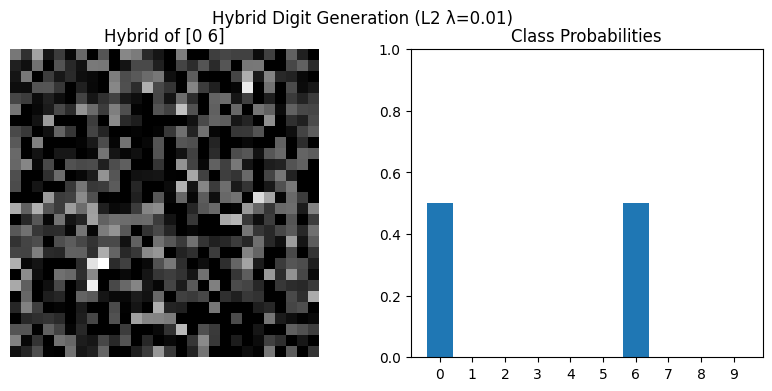


Generating hybrid with L2 λ=0.1
Iteration 0: Loss = 7.9164
Probabilities: {tensor(3): 0.002897652331739664, tensor(8): 5.5442258599214256e-05}
Iteration 50: Loss = 0.8022
Probabilities: {tensor(3): 0.5331994295120239, tensor(8): 0.4607214033603668}
Iteration 100: Loss = 0.7904
Probabilities: {tensor(3): 0.4941483438014984, tensor(8): 0.5026180148124695}
Iteration 150: Loss = 0.7820
Probabilities: {tensor(3): 0.4990253448486328, tensor(8): 0.4983799457550049}
Iteration 200: Loss = 0.7738
Probabilities: {tensor(3): 0.49901241064071655, tensor(8): 0.4985268712043762}
Iteration 250: Loss = 0.7658
Probabilities: {tensor(3): 0.4990045726299286, tensor(8): 0.4985616207122803}
Iteration 300: Loss = 0.7583
Probabilities: {tensor(3): 0.4990188181400299, tensor(8): 0.49857643246650696}
Iteration 350: Loss = 0.7513
Probabilities: {tensor(3): 0.49903935194015503, tensor(8): 0.4985993206501007}
Iteration 400: Loss = 0.7450
Probabilities: {tensor(3): 0.4990445673465729, tensor(8): 0.4986223578453064

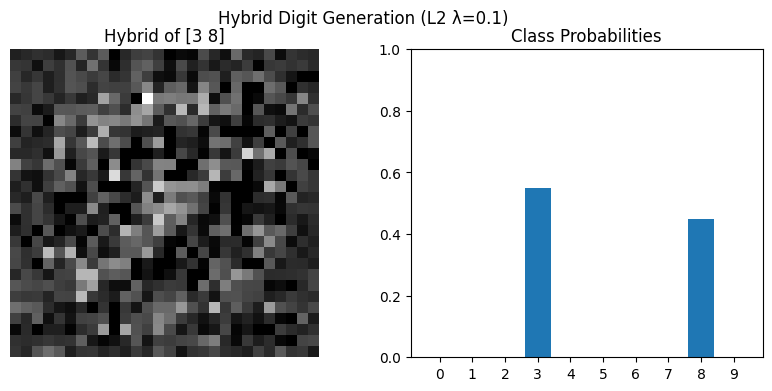

Iteration 0: Loss = 3.9149
Probabilities: {tensor(0): 0.05539778620004654, tensor(6): 0.008760732598602772}
Iteration 50: Loss = 0.7949
Probabilities: {tensor(0): 0.5145480036735535, tensor(6): 0.4853525757789612}
Iteration 100: Loss = 0.7794
Probabilities: {tensor(0): 0.49890777468681335, tensor(6): 0.5009284019470215}
Iteration 150: Loss = 0.7642
Probabilities: {tensor(0): 0.49973297119140625, tensor(6): 0.4999695420265198}
Iteration 200: Loss = 0.7507
Probabilities: {tensor(0): 0.49966585636138916, tensor(6): 0.499851256608963}
Iteration 250: Loss = 0.7396
Probabilities: {tensor(0): 0.4995696544647217, tensor(6): 0.4997687339782715}
Iteration 300: Loss = 0.7306
Probabilities: {tensor(0): 0.4995337724685669, tensor(6): 0.49968957901000977}
Iteration 350: Loss = 0.7234
Probabilities: {tensor(0): 0.4995042383670807, tensor(6): 0.4996650218963623}
Iteration 400: Loss = 0.7181
Probabilities: {tensor(0): 0.4934775233268738, tensor(6): 0.5055989623069763}
Iteration 450: Loss = 0.7140
Proba

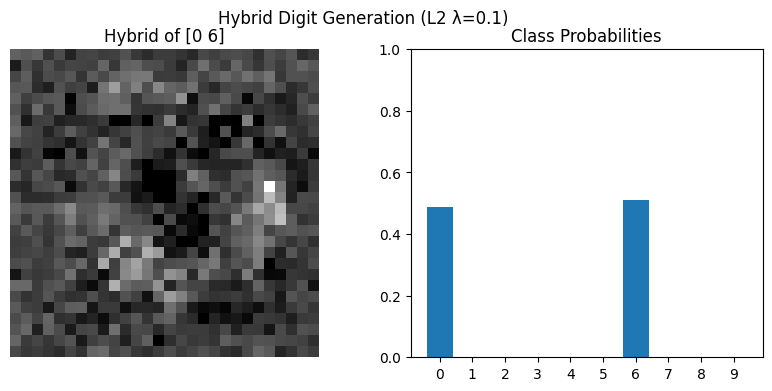


Generating hybrid with L2 λ=0.5
Iteration 0: Loss = 5.9854
Probabilities: {tensor(3): 0.11527787148952484, tensor(8): 0.0001457440375816077}
Iteration 50: Loss = 1.1169
Probabilities: {tensor(3): 0.4894501268863678, tensor(8): 0.5044983625411987}
Iteration 100: Loss = 0.9837
Probabilities: {tensor(3): 0.49372413754463196, tensor(8): 0.49919015169143677}
Iteration 150: Loss = 0.8874
Probabilities: {tensor(3): 0.49739325046539307, tensor(8): 0.4955623149871826}
Iteration 200: Loss = 0.8239
Probabilities: {tensor(3): 0.4975399971008301, tensor(8): 0.4959704875946045}
Iteration 250: Loss = 0.7831
Probabilities: {tensor(3): 0.49740877747535706, tensor(8): 0.4963834285736084}
Iteration 300: Loss = 0.7574
Probabilities: {tensor(3): 0.49723848700523376, tensor(8): 0.49671024084091187}
Iteration 350: Loss = 0.7474
Probabilities: {tensor(3): 0.5515115857124329, tensor(8): 0.4425522983074188}
Iteration 400: Loss = 0.7426
Probabilities: {tensor(3): 0.4256269633769989, tensor(8): 0.568144857883453

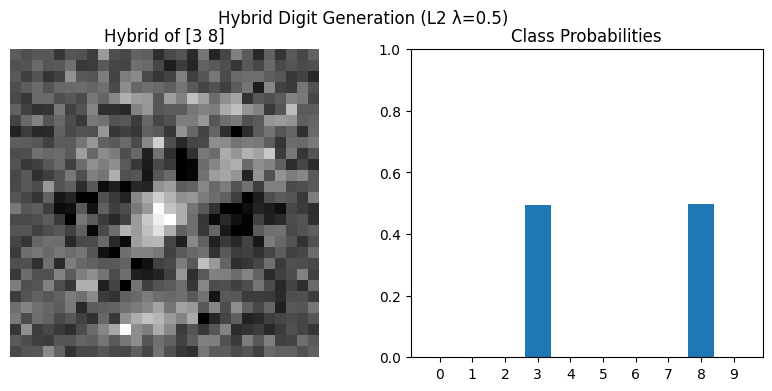

Iteration 0: Loss = 9.5535
Probabilities: {tensor(0): 0.00016645219875499606, tensor(6): 7.548463327111676e-05}
Iteration 50: Loss = 1.1027
Probabilities: {tensor(0): 0.5310637950897217, tensor(6): 0.4683576822280884}
Iteration 100: Loss = 0.9715
Probabilities: {tensor(0): 0.4977089762687683, tensor(6): 0.5010241270065308}
Iteration 150: Loss = 0.8761
Probabilities: {tensor(0): 0.49883702397346497, tensor(6): 0.49920880794525146}
Iteration 200: Loss = 0.8132
Probabilities: {tensor(0): 0.4986138939857483, tensor(6): 0.4987671375274658}
Iteration 250: Loss = 0.7734
Probabilities: {tensor(0): 0.49841898679733276, tensor(6): 0.4985409080982208}
Iteration 300: Loss = 0.7485
Probabilities: {tensor(0): 0.4981476664543152, tensor(6): 0.49869799613952637}
Iteration 350: Loss = 0.7328
Probabilities: {tensor(0): 0.49807071685791016, tensor(6): 0.49875184893608093}
Iteration 400: Loss = 0.7231
Probabilities: {tensor(0): 0.49814021587371826, tensor(6): 0.4986644983291626}
Iteration 450: Loss = 0.71

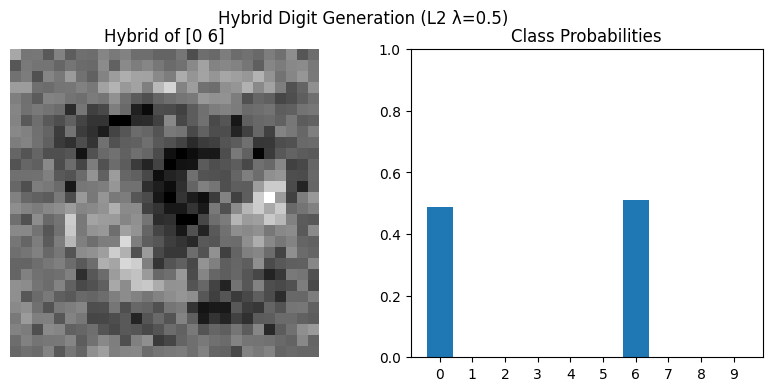


Generating hybrid with L2 λ=1.0
Iteration 0: Loss = 3.4692
Probabilities: {tensor(3): 0.2980501353740692, tensor(8): 0.022496040910482407}
Iteration 50: Loss = 1.1457
Probabilities: {tensor(3): 0.4826025068759918, tensor(8): 0.511207103729248}
Iteration 100: Loss = 0.8629
Probabilities: {tensor(3): 0.4979158937931061, tensor(8): 0.49105554819107056}
Iteration 150: Loss = 0.7871
Probabilities: {tensor(3): 0.41633668541908264, tensor(8): 0.5723587870597839}
Iteration 200: Loss = 0.7471
Probabilities: {tensor(3): 0.48197150230407715, tensor(8): 0.5079799294471741}
Iteration 250: Loss = 0.7427
Probabilities: {tensor(3): 0.443371444940567, tensor(8): 0.5466436147689819}
Iteration 300: Loss = 0.7369
Probabilities: {tensor(3): 0.45844268798828125, tensor(8): 0.5315752029418945}
Iteration 350: Loss = 0.7335
Probabilities: {tensor(3): 0.4683798551559448, tensor(8): 0.5219380855560303}
Iteration 400: Loss = 0.7319
Probabilities: {tensor(3): 0.5000537633895874, tensor(8): 0.4894188344478607}
Ite

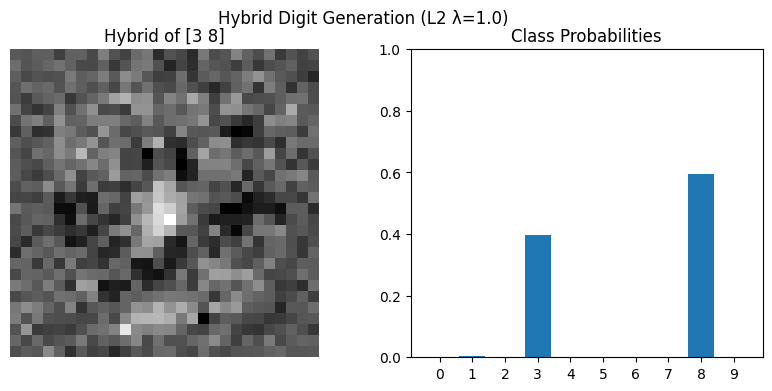

Iteration 0: Loss = 6.8703
Probabilities: {tensor(0): 0.0012494738912209868, tensor(6): 0.006159899290651083}
Iteration 50: Loss = 1.3421
Probabilities: {tensor(0): 0.5051056146621704, tensor(6): 0.49287116527557373}
Iteration 100: Loss = 0.9993
Probabilities: {tensor(0): 0.4945155382156372, tensor(6): 0.4997798502445221}
Iteration 150: Loss = 0.8434
Probabilities: {tensor(0): 0.4957523047924042, tensor(6): 0.49745383858680725}
Iteration 200: Loss = 0.7736
Probabilities: {tensor(0): 0.49619442224502563, tensor(6): 0.4975719451904297}
Iteration 250: Loss = 0.7418
Probabilities: {tensor(0): 0.4964875280857086, tensor(6): 0.49751296639442444}
Iteration 300: Loss = 0.7278
Probabilities: {tensor(0): 0.4966637194156647, tensor(6): 0.49743756651878357}
Iteration 350: Loss = 0.7217
Probabilities: {tensor(0): 0.4966534972190857, tensor(6): 0.4975338578224182}
Iteration 400: Loss = 0.7189
Probabilities: {tensor(0): 0.496775358915329, tensor(6): 0.49746599793434143}
Iteration 450: Loss = 0.7181
P

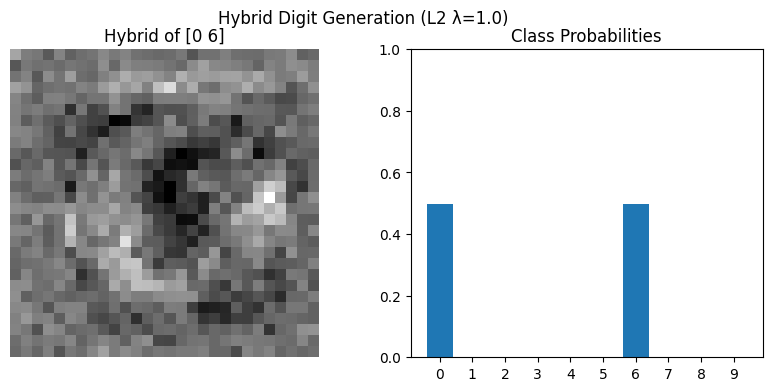


Generating hybrid with L2 λ=5.0
Iteration 0: Loss = 10.8554
Probabilities: {tensor(3): 0.015102904289960861, tensor(8): 0.0005868030129931867}
Iteration 50: Loss = 1.6373
Probabilities: {tensor(3): 0.4961574971675873, tensor(8): 0.44454967975616455}
Iteration 100: Loss = 0.8882
Probabilities: {tensor(3): 0.4800646901130676, tensor(8): 0.4790193736553192}
Iteration 150: Loss = 0.8192
Probabilities: {tensor(3): 0.48281168937683105, tensor(8): 0.47874531149864197}
Iteration 200: Loss = 0.8254
Probabilities: {tensor(3): 0.568163275718689, tensor(8): 0.3959219455718994}
Iteration 250: Loss = 0.8094
Probabilities: {tensor(3): 0.4723168909549713, tensor(8): 0.4905422627925873}
Iteration 300: Loss = 0.8112
Probabilities: {tensor(3): 0.45266780257225037, tensor(8): 0.5102900862693787}
Iteration 350: Loss = 0.8133
Probabilities: {tensor(3): 0.43778902292251587, tensor(8): 0.5250605344772339}
Iteration 400: Loss = 0.8160
Probabilities: {tensor(3): 0.4262791574001312, tensor(8): 0.536377429962158

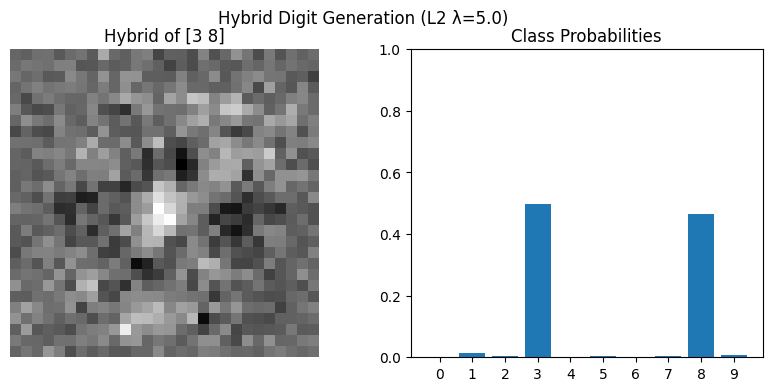

Iteration 0: Loss = 11.3455
Probabilities: {tensor(0): 0.00016232235066127032, tensor(6): 0.0205189511179924}
Iteration 50: Loss = 1.7167
Probabilities: {tensor(0): 0.5080184936523438, tensor(6): 0.46036046743392944}
Iteration 100: Loss = 0.9090
Probabilities: {tensor(0): 0.47879740595817566, tensor(6): 0.494853138923645}
Iteration 150: Loss = 0.7929
Probabilities: {tensor(0): 0.48646557331085205, tensor(6): 0.49037015438079834}
Iteration 200: Loss = 0.7731
Probabilities: {tensor(0): 0.48761940002441406, tensor(6): 0.49038660526275635}
Iteration 250: Loss = 0.7703
Probabilities: {tensor(0): 0.48742276430130005, tensor(6): 0.4909089505672455}
Iteration 300: Loss = 0.7700
Probabilities: {tensor(0): 0.488313227891922, tensor(6): 0.49006035923957825}
Iteration 350: Loss = 0.7700
Probabilities: {tensor(0): 0.48800283670425415, tensor(6): 0.4903722107410431}
Iteration 400: Loss = 0.7700
Probabilities: {tensor(0): 0.4866134524345398, tensor(6): 0.49178028106689453}
Iteration 450: Loss = 0.770

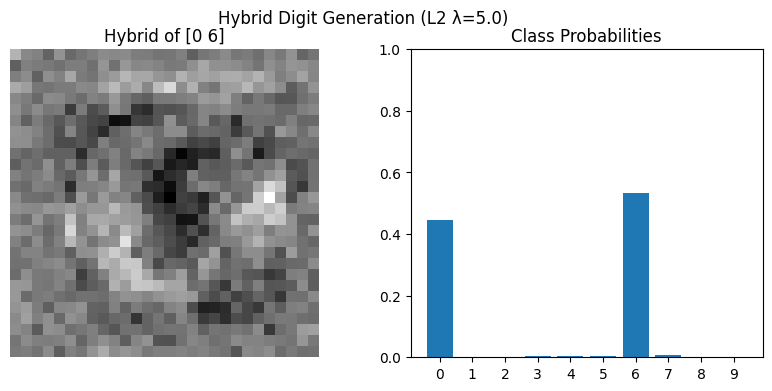


Generating hybrid with L2 λ=10.0
Iteration 0: Loss = 13.2183
Probabilities: {tensor(3): 0.17769993841648102, tensor(8): 0.0035847777035087347}
Iteration 50: Loss = 1.2641
Probabilities: {tensor(3): 0.4698054790496826, tensor(8): 0.4580433964729309}
Iteration 100: Loss = 0.8828
Probabilities: {tensor(3): 0.4752357006072998, tensor(8): 0.4625196158885956}
Iteration 150: Loss = 0.8726
Probabilities: {tensor(3): 0.4737415611743927, tensor(8): 0.46488919854164124}
Iteration 200: Loss = 0.8725
Probabilities: {tensor(3): 0.47634992003440857, tensor(8): 0.462348997592926}
Iteration 250: Loss = 0.8773
Probabilities: {tensor(3): 0.4300912916660309, tensor(8): 0.5078876614570618}
Iteration 300: Loss = 0.8720
Probabilities: {tensor(3): 0.4831831753253937, tensor(8): 0.4560903310775757}
Iteration 350: Loss = 0.8726
Probabilities: {tensor(3): 0.4630228579044342, tensor(8): 0.47592324018478394}
Iteration 400: Loss = 0.8754
Probabilities: {tensor(3): 0.42965662479400635, tensor(8): 0.5088284015655518

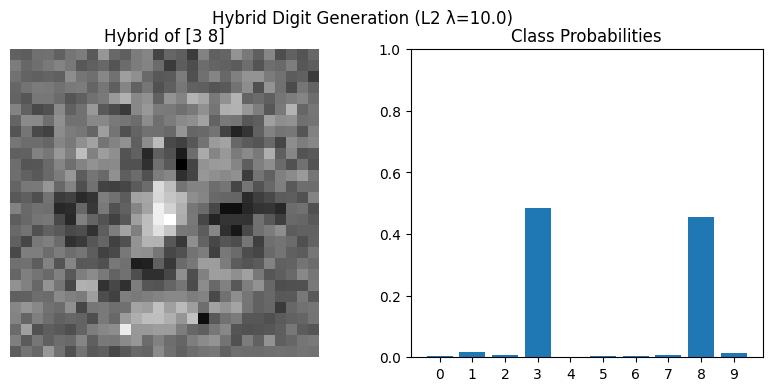

Iteration 0: Loss = 18.2257
Probabilities: {tensor(0): 0.00017683164332993329, tensor(6): 8.058183448156342e-05}
Iteration 50: Loss = 1.3206
Probabilities: {tensor(0): 0.47963380813598633, tensor(6): 0.4659004509449005}
Iteration 100: Loss = 0.8371
Probabilities: {tensor(0): 0.4791337549686432, tensor(6): 0.48316970467567444}
Iteration 150: Loss = 0.8181
Probabilities: {tensor(0): 0.4782998859882355, tensor(6): 0.48390838503837585}
Iteration 200: Loss = 0.8175
Probabilities: {tensor(0): 0.47943398356437683, tensor(6): 0.4827378988265991}
Iteration 250: Loss = 0.8175
Probabilities: {tensor(0): 0.4787445664405823, tensor(6): 0.48346254229545593}
Iteration 300: Loss = 0.8176
Probabilities: {tensor(0): 0.48715317249298096, tensor(6): 0.47487759590148926}
Iteration 350: Loss = 0.8177
Probabilities: {tensor(0): 0.4693165421485901, tensor(6): 0.493038535118103}
Iteration 400: Loss = 0.8183
Probabilities: {tensor(0): 0.460682213306427, tensor(6): 0.5018103718757629}
Iteration 450: Loss = 0.817

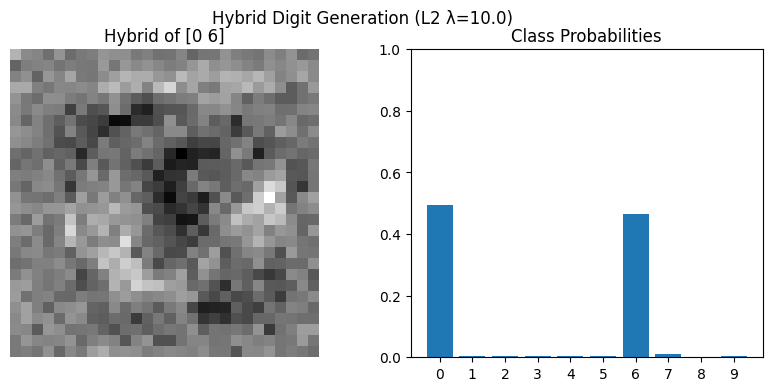

In [3]:
def generate_digits(model, lambda_l2=0.0, num_iterations=1000):
    num_digits = 10
    # Initialize random noise images
    images = torch.randn((num_digits, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.arange(num_digits, device=device)

    # Inverse transform for visualization (undo MNIST normalization)
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'confidences': [], 'loss': []}
    optimizer = torch.optim.Adam([images], lr=0.05)

    # Store initial images (before any optimization)
    with torch.no_grad():
      initial_images = images.detach().clone().cpu()

    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, num_digits+i+1)
        init_img = inverse_normalize(initial_images[i]).clamp(0, 1).numpy()[0]
        plt.imshow(init_img, cmap='gray')
        plt.title("Initial Noise")
        plt.axis('off')


    for iteration in range(num_iterations):
        if images.grad is not None:
            images.grad.zero_()

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        confidences = probs[torch.arange(num_digits), targets]
        optimizer.zero_grad()

        loss = nn.functional.cross_entropy(outputs, targets)
        loss += lambda_l2 * images.pow(2).mean()

        loss.backward()
        optimizer.step()

        # # update initial images based on gradient
        # with torch.no_grad():
        #     images -= learning_rate * images.grad
        #     images.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized images for visualization
            with torch.no_grad():
                denorm_images = inverse_normalize(images).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_images)
                history['confidences'].append(confidences.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}, Avg Confidence = {confidences.mean().item():.4f}")

    # Visualization
    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, i+1)
        plt.imshow(history['images'][-1][i][0], cmap='gray')
        plt.title(f"Target: {i}\nConf: {history['confidences'][-1][i]:.2f}")
        plt.axis('off')

    plt.suptitle(f"Digit Generation Results (L2 λ={lambda_l2})")
    plt.show()

    # Plot loss curve
    plt.figure()
    plt.plot(history['loss'])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

    return images.detach()

def generate_hybrid(model, targets, weights=None, lambda_l2=0.0, num_iterations=1000):
    if weights is None:
        weights = [1.0/len(targets)] * len(targets)

    image = torch.randn((1, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.tensor(targets, device=device)

    # Inverse transform for visualization
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'probs': [], 'loss': []}
    optimizer = torch.optim.Adam([image], lr=0.05)

    for iteration in range(num_iterations):
        if image.grad is not None:
            image.grad.zero_()

        output = model(image)
        probs = torch.softmax(output, dim=1)
        optimizer.zero_grad()

        # calculate loss for both images at the same time
        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

        loss.backward()
        optimizer.step()

        # with torch.no_grad():
        #     image -= learning_rate * image.grad
        #     image.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized image
            with torch.no_grad():
                denorm_img = inverse_normalize(image).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_img)
                history['probs'].append(probs.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}")
            print("Probabilities:", {t: probs[0, t].item() for t in targets})

    # Visualization
    plt.figure(figsize=(10, 4))

    # Show final image (properly denormalized)
    final_img = history['images'][-1][0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(final_img, cmap='gray')
    plt.title(f"Hybrid of {targets.cpu().numpy()}")
    plt.axis('off')

    # Show probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), history['probs'][-1][0])
    plt.xticks(range(10))
    plt.ylim(0, 1)
    plt.title("Class Probabilities")

    plt.suptitle(f"Hybrid Digit Generation (L2 λ={lambda_l2})")
    plt.show()

    return image.detach()


print("\n=== Task 1: Generating digits 0-9 from noise ===")
generated_digits = generate_digits(model, lambda_l2=0.0)

print("\n=== Task 2: Generating hybrid digits ===")
hybrid_3_8 = generate_hybrid(model, [3, 8], lambda_l2=0.0)
hybrid_0_6 = generate_hybrid(model, [0, 6], lambda_l2=0.0)

hybrid_3_8 = generate_hybrid(model, [3, 8], lambda_l2=10.0)
hybrid_0_6 = generate_hybrid(model, [0, 6], lambda_l2=10.0)

print("\n=== Task 3: Testing L2 regularization ===")
l2_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
for l2 in l2_values:
    print(f"\nGenerating with L2 λ={l2}")
    _ = generate_digits(model, lambda_l2=l2, num_iterations=1000)

for l2 in l2_values:
    print(f"\nGenerating hybrid with L2 λ={l2}")
    hybrid_3_8 = generate_hybrid(model, [3, 8], lambda_l2=l2)
    hybrid_0_6 = generate_hybrid(model, [0, 6], lambda_l2=l2)

# Questions
**Do the generated images resemble real MNIST digits? Why or why not?**

Yes, they resemble real MNIST digits a little, but not much. The network sees patterns differently then humans and focuses on different weird (for humans) pixels.


 **Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously.**

  Idea: We wanted image that has ~50% chance for digit x and ~50% chance for digit y.
  My approach was to calculate loss for both target images, so loss for both images will matter and will change the inputs.
  It was implemented here:

        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

I did it for pairs [3,8] and [0,6]


**Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.**

I did the previous task with L2 penalty here:

        l2_values = [0.001, 0.01, 0.1, 1.0, 10.0]
        for l2 in l2_values:
            print(f"\nGenerating with L2 λ={l2}")
            _ = generate_digits(model, lambda_l2=l2, num_iterations=300)

L2 Penalty acts like a "noise tax", it punishes extreme pixel values and makes smoother images.
So we have a trade-off: More smoothing = nicer looking but less confident.

Additionally, we see the loss curve changes with different lambas, but the best "loss drop" is for the smallest lambdas.
